In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set()
today = datetime.datetime.today()

In [2]:
rdf = pd.read_csv('./inmatesWithCoords.csv')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,6,7,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rdf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'actRelDate', 'age', 'faclCode',
       'faclName', 'faclType', 'faclURL', 'inmateNum', 'inmateNumType',
       'nameFirst', 'nameLast', 'nameMiddle', 'projRelDate', 'race', 'region',
       'releaseCode', 'sex', 'suffix', 'inmateId', '_region', 'regionNum',
       'gmap_query', 'lat', 'lng', 'address', 'state', 'orientation_y',
       'orientation_x'],
      dtype='object')

In [4]:
df = rdf[[ 'actRelDate', 'age', 'faclCode',
       'faclName', 'faclType', 'inmateNum',
       'nameFirst', 'nameLast', 'nameMiddle', 'projRelDate', 'race',
       'releaseCode', 'sex', 'inmateId',
       'lat', 'lng', 'address', 'state', 'orientation_y',
       'orientation_x']]

In [5]:
releasing_df = df[df['projRelDate'].apply(lambda x: (re.match(r'\d+/\d+/\d+', str(x))) != None)]

In [6]:
nonreleasing_df = df[~df['projRelDate'].apply(lambda x: (re.match(r'\d+/\d+/\d+', str(x))) != None)]

UNKNOWN       50432
LIFE            603
STATE PRIS       26
DEATH SENT       14
HOSTRT CMP        6
MDD DTER C        2
Name: projRelDate, dtype: int64


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


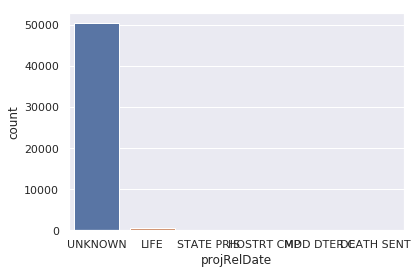

In [7]:
sns.countplot(nonreleasing_df['projRelDate'].dropna())
print(nonreleasing_df['projRelDate'].value_counts())

In [8]:
releasing_df.sort_values('projRelDate', ascending=False).head()

,actRelDate,age,faclCode,faclName,faclType,inmateNum,nameFirst,nameLast,nameMiddle,projRelDate,race,releaseCode,sex,inmateId,lat,lng,address,state,orientation_y,orientation_x
316592,NaN,29.0,HAZ,Hazelton,USP,66506-018,ROWY,DE JESUS VASQUEZ,NaN,12/31/2041,Black,NaN,Male,66506,39.673851,-79.498826,"1640 Sky View Dr, Bruceton Mills, WV 26525, USA",WV,North,East
360650,NaN,38.0,ALP,Allenwood,USP,03601-007,WILLIAM,BLACK,R,12/31/2035,Black,NaN,Male,3601,41.132519,-76.925186,"Main Access Rd, Allenwood, PA 17810, USA",PA,North,East
334122,NaN,49.0,FTD,Fort Dix,FCI,17830-069,JOEL,RIVERA-ALEJANDRO,NaN,12/31/2034,White,NaN,Male,17830,39.998655,-74.613599,"5756 Hartford St & Pointville Road, Fort Dix, ...",NJ,North,East
291635,NaN,51.0,BML,Beaumont Low,FCI,60227-080,SEDRIC,THOMPSON,BARSHEA,12/31/2034,Black,NaN,Male,60227,29.964945,-94.076452,"Beaumont, TX 77705, USA",TX,South,West
240982,NaN,31.0,YAM,Yazoo City Medium,FCI,11104-010,LEE,GARCIA,ROY,12/31/2033,White,NaN,Male,11104,32.884262,-90.436989,"2225 Haley Barbour Pkwy, Yazoo City, MS 39194,...",MS,South,West


In [81]:
releasing_df['daysUntilRelease'] = releasing_df['projRelDate'].apply(
    lambda x: np.clip((datetime.datetime.strptime(x, '%m/%d/%Y') - today).days, 0, 1e6)
)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [82]:
releasing_df.sort_values('daysUntilRelease', ascending=False).head()

,actRelDate,age,faclCode,faclName,faclType,inmateNum,nameFirst,nameLast,nameMiddle,projRelDate,...,releaseCode,sex,inmateId,lat,lng,address,state,orientation_y,orientation_x,daysUntilRelease
365420,NaN,66.0,OTV,Otisville,FCI,32610-054,SHOLAM,WEISS,NaN,06/10/2738,...,NaN,Male,32610,41.495560,-74.527494,"2 Mile Drive, Otisville, NY 10963, USA",NY,North,East,262106.0
380372,NaN,65.0,ATW,Atwater,USP,33703-019,MIGUEL,MACIAS,NaN,10/27/2494,...,NaN,Male,33703,37.386069,-120.558576,"1 Federal Way, Atwater, CA 95301, USA",CA,North,West,173127.0
234215,NaN,54.0,TCP,Tucson,USP,27205-001,JAMES,HULSEY,SHAWN,05/14/2419,...,NaN,Male,27205,32.084730,-110.865276,"9300 S Wilmot Rd, Tucson, AZ 85756, USA",AZ,South,West,145567.0
383770,NaN,36.0,ALI,Aliceville,FCI,27201-001,CHRISTINE,MCKIM,STAGGS,07/21/2390,...,NaN,Female,27201,33.176075,-88.192954,"11070 AL-14, Aliceville, AL 35442, USA",AL,South,West,135043.0
325486,NaN,57.0,ALM,Allenwood Medium,FCI,08008-016,JOSEPH,KINARD,NaN,01/13/2295,...,NaN,Male,8008,41.127492,-76.921938,"2 US-15, Allenwood, PA 17810, USA",PA,North,East,100156.0


In [117]:
releasing_df.to_csv('./releasing_df.csv')

In [83]:
df.count()

actRelDate       315563
age              385712
faclCode         255798
faclName         387076
faclType         255798
inmateNum        387076
nameFirst        387076
nameLast         387075
nameMiddle       176811
projRelDate       71513
race             387076
releaseCode      315563
sex              387076
inmateId         387076
lat              321437
lng              321437
address          321437
state            321437
orientation_y    387076
orientation_x    387076
dtype: int64

In [93]:
# average sentence left to be served
releasing_df['daysUntilRelease'].sum()

31219482.0

There are 31,219,482 days left to be served in federal prison. About 85,000 years.

In [94]:
releasing_df.groupby('race').mean()['daysUntilRelease']

race
American Indian    1465.004854
Asian              1474.053812
Black              1881.807053
White              1375.264860
Name: daysUntilRelease, dtype: float64

Are these differences statistically significant?

In [ ]:
releasing_df.groupby('sex').mean()['daysUntilRelease']

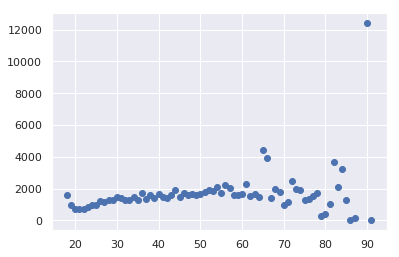

In [99]:
plt.scatter(releasing_df.groupby('age').mean()['daysUntilRelease'].index, releasing_df.groupby('age').mean()['daysUntilRelease'])

In [87]:
releasing_df.groupby('state').mean()['daysUntilRelease']

state
00969     892.714286
AL       1795.036585
AR       1438.318996
AZ       2759.498529
CA       1554.003904
CO       2132.329073
CT       1250.243590
FL       1966.093555
GA        986.274038
HI        248.428571
IL       2195.712621
IN       2338.042918
KS       1110.775000
KY       2112.353053
LA       2103.421687
MA       1838.392857
MD        919.587209
MI       1173.374648
MN       1340.318367
MO       2060.476636
MS       2055.518349
NC       1514.795247
NH       1572.559322
NJ       1825.535014
NY       2649.882143
OH       1737.427230
OK        963.001832
OR        941.440252
PA       1853.398833
SC       2060.419118
SD        917.480000
TN       1170.647482
TX       1076.147639
VA       2567.225722
WA        445.153846
WI       1289.173913
WV       2237.420391
Name: daysUntilRelease, dtype: float64

In [88]:
releasing_df.groupby('orientation_x').mean()['daysUntilRelease']

orientation_x
East    1572.184339
West    1485.346870
Name: daysUntilRelease, dtype: float64

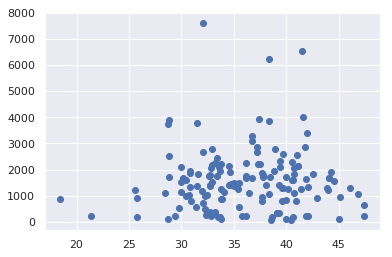

In [100]:
plt.scatter(releasing_df.groupby('lat').mean()['daysUntilRelease'].index, releasing_df.groupby('lat').mean()['daysUntilRelease'])

In [89]:
releasing_df.groupby('orientation_y').mean()['daysUntilRelease']

orientation_y
North    1854.891194
South    1354.595549
Name: daysUntilRelease, dtype: float64

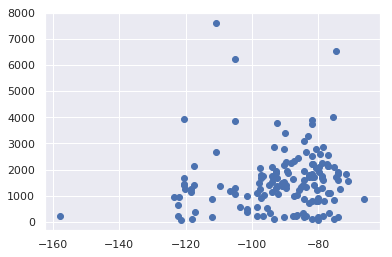

In [101]:
plt.scatter(releasing_df.groupby('lng').mean()['daysUntilRelease'].index, releasing_df.groupby('lng').mean()['daysUntilRelease'])

In [91]:
releasing_df.groupby('faclCode').mean()['daysUntilRelease']

faclCode
ALD     811.844444
ALF    1686.834951
ALI    2271.398810
ALM    2639.050000
ALP    2122.181818
ASH    1721.757282
ATL    1966.939227
ATW    3930.177419
BAS    1666.820339
BEC    1723.046296
BEN    1914.350427
BER    1572.559322
BIG    1756.102564
BML    1509.568323
BMM    1129.167939
BMP    2106.289855
BRO    1594.657895
BRY    1039.508772
BSC     441.308550
BSF     481.451505
BSY    1803.991150
BTF    2209.169643
BUF    1695.178571
BUH    2271.568966
BUT    1198.411765
CAA    4018.272727
CAT     176.507042
CBR     358.414286
CCC    1640.000000
CCH     224.333333
          ...     
REE     656.807339
RIV    1099.390977
RVS     451.434343
SAF    1375.538012
SCH    1122.086207
SDC     395.709677
SEA    1756.553299
SET     226.027778
SHE     941.440252
SPG    2855.400000
SST    1308.050633
TAL    1599.961538
TCN    2655.760000
TCP    7606.540984
TDG    2440.590164
TEX    1774.620000
THA    1511.961165
THP    2992.553846
TOM    3389.310606
TRM    1271.046729
TRV    1105.227941
VIM

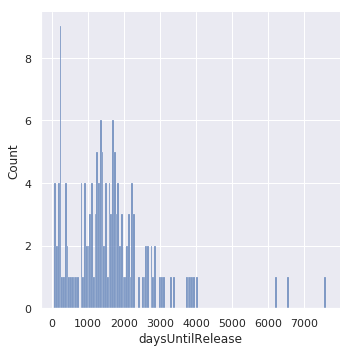

In [92]:
sns.displot(releasing_df.groupby('faclCode').sum()['daysUntilRelease'] / releasing_df.groupby('faclCode').count()['daysUntilRelease'], bins=155)

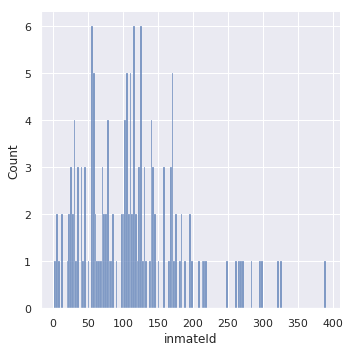

In [113]:
sns.displot(releasing_df.groupby('faclCode').count()['inmateId'], bins=155)

In [ ]:
sns.displot(releasing_df.groupby('faclCode').sum()['daysUntilRelease'] / releasing_df.groupby('faclCode').count()['daysUntilRelease'], bins=155)